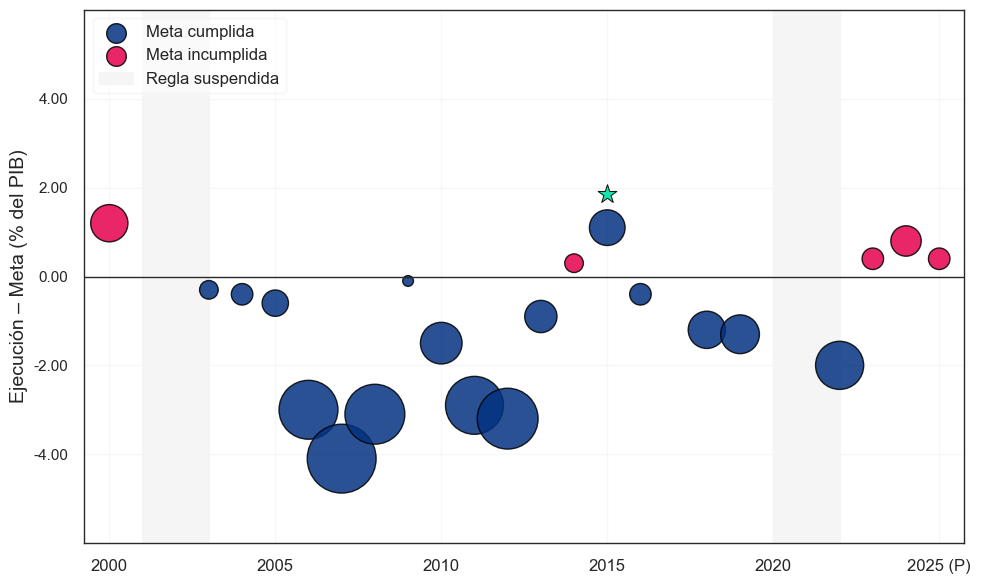

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle, Patch
from matplotlib.ticker import FormatStrFormatter

# Datos
data = {
    'year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
             2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'y_value': [1.2, 0.8, 1.1, -0.3, -0.4, -0.6, -3.0, -4.1, -3.1, -0.1, -1.5, -2.9, -3.2, -0.9, 0.3, 1.1,
                -0.4, 0.0, -1.2, -1.3, 6.8, 0.7, -2.0, 0.4, 0.8, 0.4],
    'meta': ["Meta incumplida", "Regla suspendida", "Regla suspendida", "Meta cumplida", "Meta cumplida",
             "Meta cumplida", "Meta cumplida", "Meta cumplida", "Meta cumplida", "Meta cumplida", "Meta cumplida",
             "Meta cumplida", "Meta cumplida", "Meta cumplida", "Meta incumplida", "Meta cumplida", "Meta cumplida",
             "Meta cumplida", "Meta cumplida", "Meta cumplida", "Regla suspendida", "Regla suspendida",
             "Meta cumplida", "Meta incumplida", "Meta incumplida", "Meta incumplida"]
}

df = pd.DataFrame(data)
df['size'] = abs(df['y_value']) * 600

color_map = {"Meta cumplida": "#033280", "Meta incumplida": "#E6004C"}

fig, ax = plt.subplots(figsize=(10, 6))

# Bandas
ax.add_patch(Rectangle((2001, -6), 2, 14, color="#F5F5F5", alpha=1))
ax.add_patch(Rectangle((2020, -6), 2, 14, color="#F5F5F5", alpha=1))

# Burbujas
for meta in ["Meta cumplida", "Meta incumplida"]:
    meta_data = df[df['meta'] == meta]
    ax.scatter(meta_data['year'], meta_data['y_value'],
               s=meta_data['size'],
               c=meta_data['meta'].map(color_map),
               edgecolors='black', linewidths=1, alpha=0.85)

# Línea horizontal en 0
ax.axhline(0, color='#292929', linestyle='-', linewidth=1)

# Estrella
ax.scatter([2015], [1.85], s=200, c="#00DFA2", alpha=0.9,
           edgecolors="black", linewidths=0.75, marker="*", zorder=5)

# Ejes
ax.set_ylim(-6, 6)
ax.set_yticks(np.arange(-4, 6, 2))
ax.set_ylabel("Ejecución – Meta (% del PIB)", fontsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_xlim(1999.25, 2025.75)
xticks = np.arange(2000, 2026, 5)
xticklabels = [f"{x} (P)" if x == 2025 else str(x) for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)

# Leyenda
legend_handles = [
    plt.scatter([], [], s=200, c="#033280", alpha=0.85, edgecolors="black", label="Meta cumplida"),
    plt.scatter([], [], s=200, c="#E6004C", alpha=0.85, edgecolors="black", label="Meta incumplida"),
    Patch(facecolor="#F5F5F5", edgecolor="#F5F5F5", label="Regla suspendida")
]
legend = ax.legend(handles=legend_handles, loc='upper left', frameon=True, fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.5)
legend.get_frame().set_edgecolor('#f5f5f5')
legend.get_frame().set_linewidth(2)

# Rejilla
ax.grid(True, color='#f5f5f5', alpha=0.75, linewidth=1, zorder=0)

# Bordes
for spine in ax.spines.values():
    spine.set_edgecolor('#292929')
    spine.set_linewidth(1.0)
    spine.set_zorder(3)

# FORZAR TICKS VISIBLES
ax.tick_params(axis='both', which='major', length=8, width=1.5, color='black', direction='out', zorder=4)
ax.tick_params(axis='both', which='minor', length=4, width=1, color='black', direction='out', zorder=4)
ax.minorticks_on()  # activa minor ticks

plt.tight_layout()
plt.savefig("agenda_3.png", dpi=300)
plt.show()



In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'ruta/a/tu/archivo/mef_ministers_dataset.xlsx'  # Asegúrate de cambiar esta ruta
df = pd.read_excel(file_path)

# Verifica que los datos se hayan cargado correctamente
print(df.head())
